## Dataset Used: intermediate.jsoncel from ocpa github sample logs

In [ ]:
#make a readme and a requirements file

In [7]:
#importing event log 
from ocpa.objects.log.importer.ocel import factory as ocel_import_factory
filename = "intermediate.jsonocel"
ocel = ocel_import_factory.apply(filename)

# the filetype of the datasets posted on the ocel website does not match the ocpm documentation input filetype
# json vs jsonocel

In [8]:
#process discovery
from ocpa.algo.discovery.ocpn import algorithm as ocpn_discovery_factory
from ocpa.visualization.oc_petri_net import factory as ocpn_vis_factory
ocel = ocel_import_factory.apply(file_path=filename)
ocpn = ocpn_discovery_factory.apply(ocel, parameters={"debug": False})
ocpn_vis_factory.save(ocpn_vis_factory.apply(ocpn), "oc_petri_net.png")

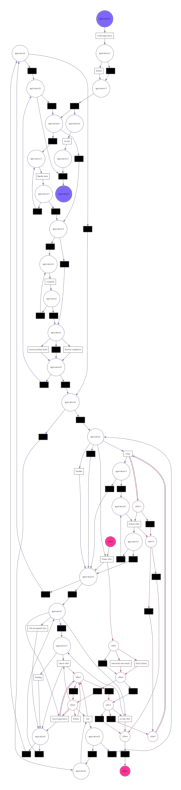

In [24]:
#view the ocpm petri net
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# cannot increase the size of image here, tried out matplotlib and graphviz paramtere tuning
img = mpimg.imread("oc_petri_net.png")
plt.figure(figsize=(15, 10))
plt.imshow(img)
plt.axis("off")  # Hide axes
plt.show()

In [ ]:
#variant calculation and layouting
#The variant layouting just returns a positioning of chevrons as coordinates.
#Instead of drawing the entire process flow directly, the layout algorithm only computes coordinates (X, Y positions) for these elements, 
#so they can be plotted or displayed.


from ocpa.visualization.log.variants import factory as variants_visualization_factory
print("Number of process executions: "+str(len(ocel.process_executions)))
print("Number of variants: "+str(len(ocel.variants)))
variant_layouting = variants_visualization_factory.apply(ocel)
print(variant_layouting[ocel.variants[0]])

Number of process executions: 1000
Number of variants: 917
([['Accept offer', [[11, 11], [0, 1]]], ['Pending', [[12, 12], [0]]], ['Cancel offer', [[13, 13], [0, 2]]], ['Cancel offer', [[14, 14], [0, 3]]], ['Cancel offer', [[15, 15], [0, 4]]], ['Create offer', [[6, 6], [0, 2]]], ['Create offer', [[7, 7], [0, 1]]], ['Send (mail and online)', [[8, 8], [1]]], ['Send (mail and online)', [[7, 12], [2]]], ['Create application', [[0, 0], [0]]], ['Accept', [[1, 1], [0]]], ['Create offer', [[2, 2], [0, 4]]], ['Send (mail and online)', [[3, 3], [4]]], ['Complete', [[3, 3], [0]]], ['Call', [[4, 4], [0, 4]]], ['Create offer', [[5, 5], [0, 3]]], ['Send (mail and online)', [[6, 13], [3]]], ['Validate', [[8, 8], [0]]], ['Return', [[9, 10], [1]]], ['Call incomplete files', [[9, 9], [0]]], ['Validate', [[10, 10], [0]]]], {0: ('application', 'application_1'), 1: ('offer', 'offer_1'), 2: ('offer', 'offer_2'), 3: ('offer', 'offer_3'), 4: ('offer', 'offer_4')})


Hard to display 917 variants, checked on the variant explorer in ocpi
Only 2 objects , application and offer , only seen application 1 but multiple offers (offer1, offer 2... 5)